In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler #scaling

from sklearn.feature_selection import RFE #automated feature selection 
from sklearn.linear_model import LinearRegression # model training

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor #VIF
from sklearn.metrics import r2_score #R-sqaure

In [84]:
cars_original = pd.read_csv(r"C:\Users\Tamma\Desktop\PGD ML & AI\3. Machine Learning - 1\Linear Regression\Linear Regression Assignment\CarPrice_Assignment.csv")

In [85]:
cars_original.shape

(205, 26)

In [86]:
cars_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [87]:
cars_original.loc[cars_original.isna().any(axis=1)]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


##  No Null values :)


In [88]:
cars_original.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [89]:
cars_original#.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [90]:
cars_original['CarName'].dtype

dtype('O')

CarName includes the Car Brand and the Car model<br>
Since we only need Car Brand name for analysis , let's remove the model name from CarName column

In [91]:
cars_original['CarName'] = cars_original.CarName.apply(lambda x:x.split()[0])#.str.split(' ')

In [92]:
cars_original#['CarName']

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [93]:
print(cars_original.CarName.unique())
cars_original.CarName.nunique()

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


28

 ### <font color = "blue">Below cars are actually the same brand but either miss-spelled or used as achronym. </font>
 
 (maxda == mazda) , (toyota == toyouta), (volkswagen == vokswagen==vw), (nissan == Nissan), (porsche == porcshce) 

In [94]:
pd.DataFrame(cars_original.CarName.value_counts())


,CarName
toyota,31
nissan,17
mazda,15
mitsubishi,13
honda,13
subaru,12
peugeot,11
volvo,11
volkswagen,9
dodge,9


In [95]:
print(cars_original.CarName.value_counts().shape)

(28,)


In [96]:
values = {'maxda':'mazda','toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen','Nissan':'nissan','porcshce':'porsche'}
cars_original.CarName = cars_original.CarName.replace(values)

In [97]:
#Check
cars_original.loc[cars_original.CarName.isin(['vw','maxda','toyouta','vokswagen','Nissan','porcshce'])]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [98]:
 cars_original.CarName.nunique()

22

In [99]:
pd.DataFrame(cars_original.CarName.value_counts()).shape

(22, 1)

In [100]:
pd.DataFrame(cars_original.CarName.value_counts())

,CarName
toyota,32
nissan,18
mazda,17
honda,13
mitsubishi,13
subaru,12
volkswagen,12
peugeot,11
volvo,11
dodge,9


In [101]:
pd.set_option('display.max_columns',None)
cars_original.drop('car_ID',axis=1,inplace=True)
cars_original

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Analysis / Getting familier with the data

Text(0.5, 1.0, 'symboling')

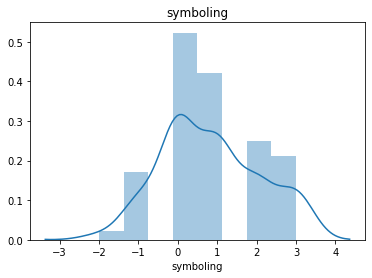

In [1085]:
sns.distplot(cars_original['symboling'])
plt.title("symboling")

Pairplot shows the relations of all the variables in the date frame inclusing target variable

C:\Users\Tamma\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Tamma\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Tamma\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


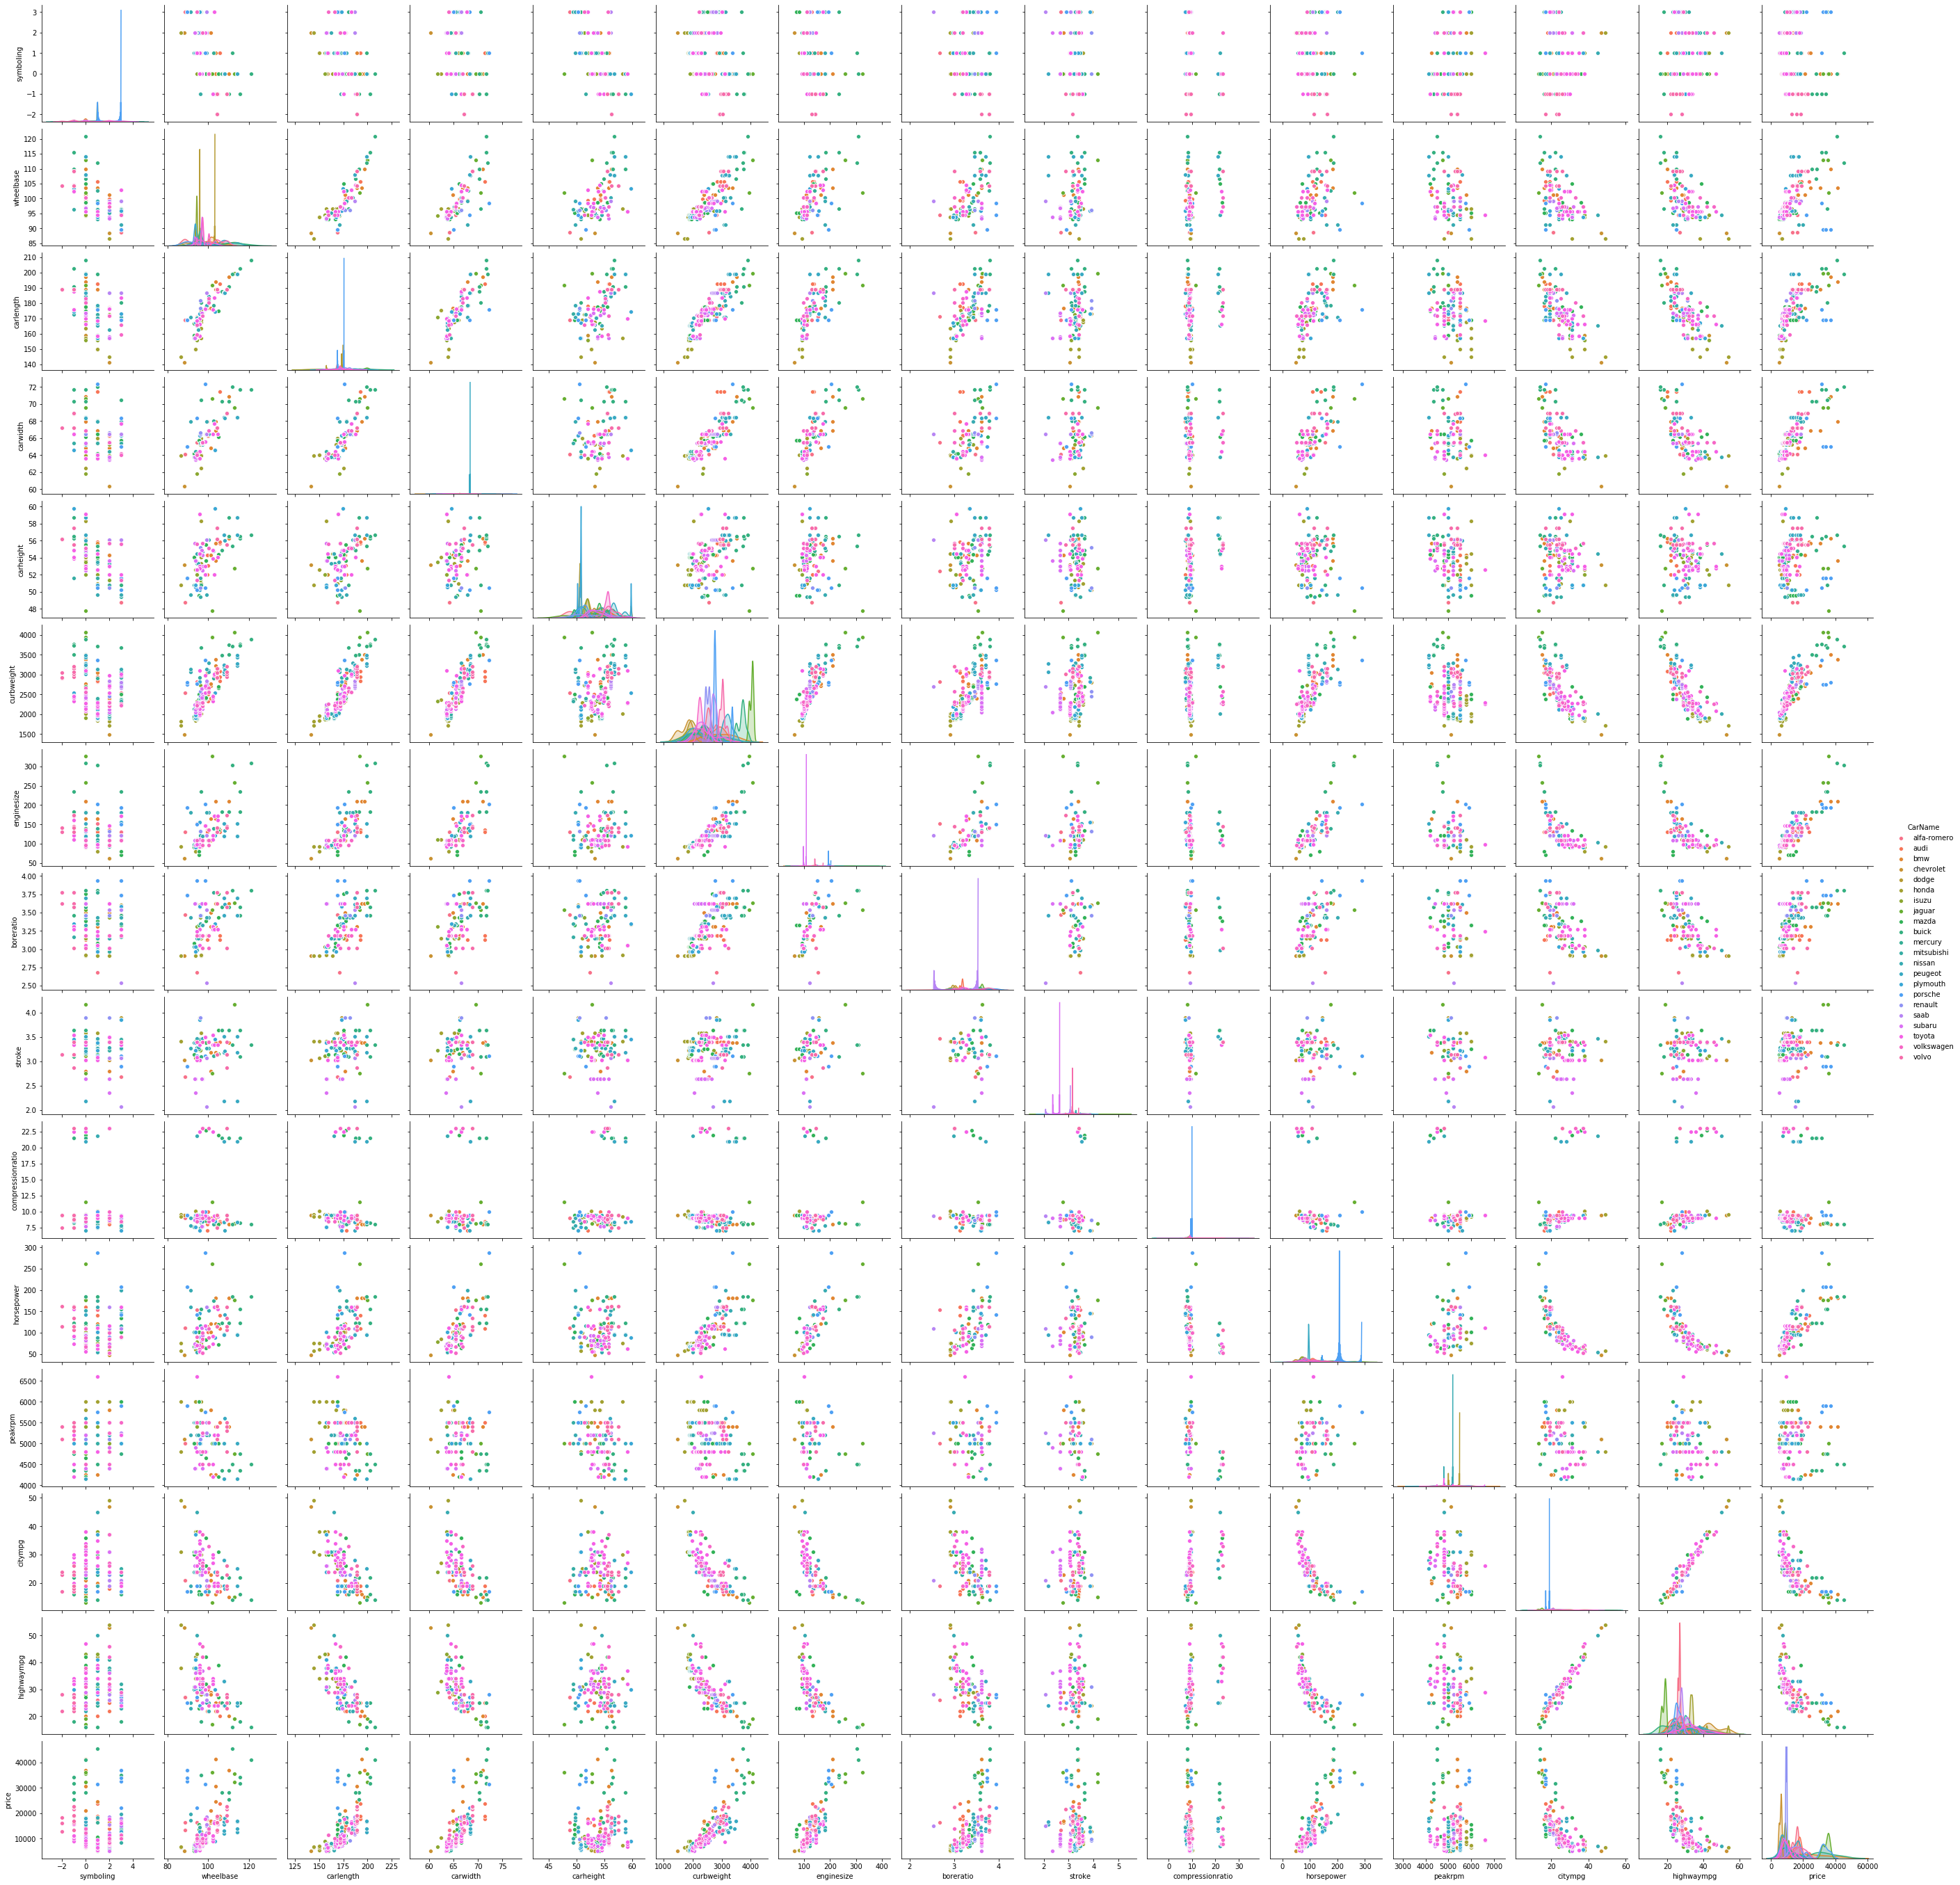

In [821]:
#numerical variables
#plt.figure(figsize=(12,23))
sns.pairplot(cars_original, palette = "husl", hue='CarName')

Key Points :
1. Higer Milage the lesser the price
2. hoursepower, <font color="red">boreratio</font>, enginesize, curbweight, carwidth, carlength, wheelbase highly correlated with price. <br> Red ones are in bit lesser corerelated with price

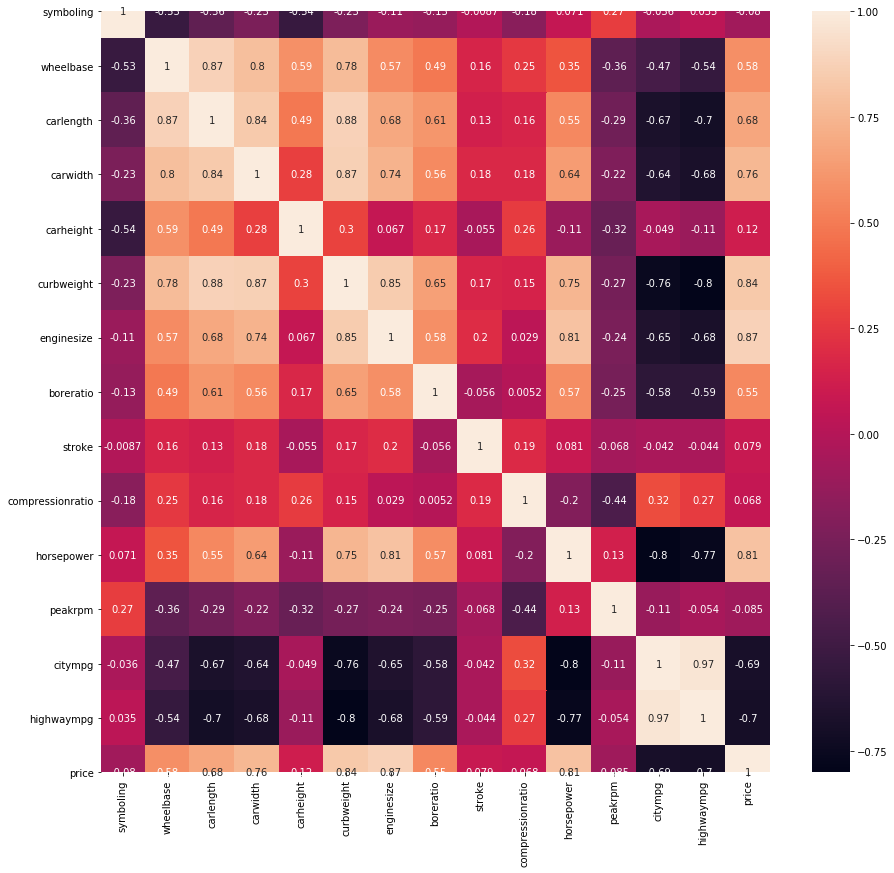

In [759]:
#numeric variabes
plt.figure(figsize=(15,14))
sns.heatmap(cars_original.corr(), annot=True)

In [65]:
cars_original.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [66]:
cars_original.symboling.value_counts() #categorical

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [67]:
cars_original.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [1089]:
cars_original.aspiration.value_counts() #categorical

std      168
turbo     37
Name: aspiration, dtype: int64

In [1090]:
cars_original.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [1091]:
cars_original.carbody.value_counts() #categorical

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [1092]:
cars_original.drivewheel.value_counts() 

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [1093]:
cars_original.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [1094]:
cars_original.enginelocation.value_counts() #categorical

front    202
rear       3
Name: enginelocation, dtype: int64

In [1095]:
#cars.wheelbase.value_counts() # continues #carlength	carwidth	carheight	curbweight

In [1096]:
cars_original.enginetype.value_counts() #categorical

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [1097]:
cars_original.fuelsystem.value_counts() #categorical

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

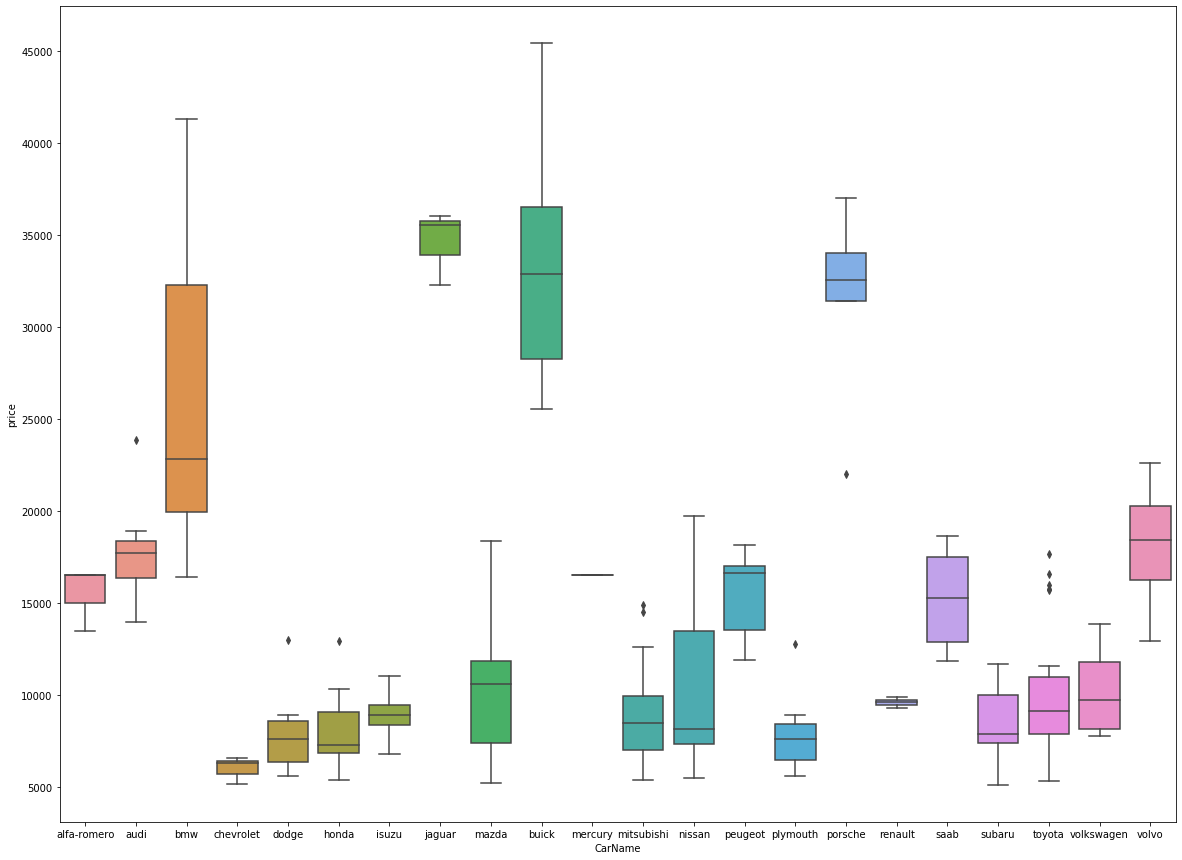

In [1098]:
plt.figure(figsize=(20,15))
#plt.subplot(2,3,1)
sns.boxplot(x=cars_original.CarName,y=cars_original.price)

#bmw, buick, jaguar, porche, ------ Luxery

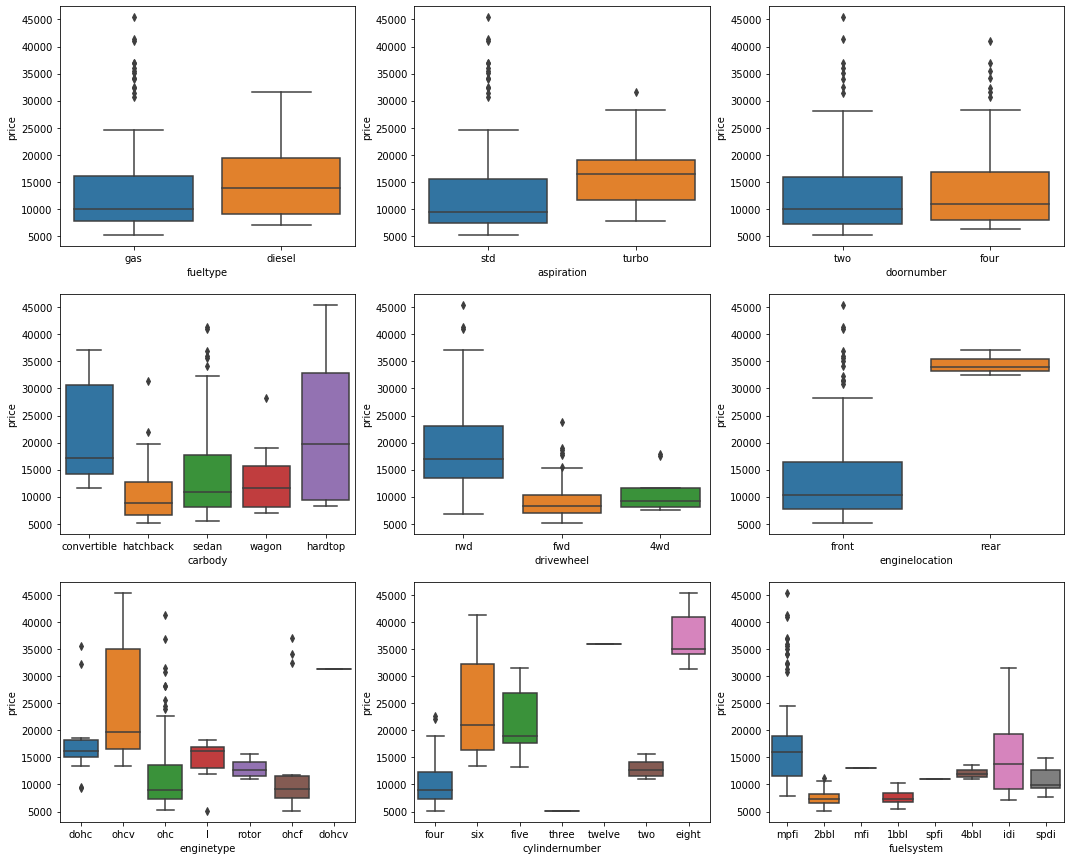

In [864]:
plt.figure(figsize=(18,15))
plt.subplot(3,3,1)
sns.boxplot(x=cars_original.fueltype,y=cars_original.price)

plt.subplot(3,3,2)
sns.boxplot(x=cars_original.aspiration,y=cars_original.price)

plt.subplot(3,3,3)
sns.boxplot(x=cars_original.doornumber,y=cars_original.price)

plt.subplot(3,3,4)
sns.boxplot(x=cars_original.carbody,y=cars_original.price)

plt.subplot(3,3,5)
sns.boxplot(x=cars_original.drivewheel,y=cars_original.price)

plt.subplot(3,3,6)
sns.boxplot(x=cars_original.enginelocation,y=cars_original.price)

plt.subplot(3,3,7)
sns.boxplot(x=cars_original.enginetype,y=cars_original.price)

plt.subplot(3,3,8)
sns.boxplot(x=cars_original.cylindernumber,y=cars_original.price)

plt.subplot(3,3,9)
sns.boxplot(x=cars_original.fuelsystem,y=cars_original.price)


Observations :
 1. Most Cars with diesel are expensive.
 2. Most cars with turbo aspiration are expensive.
 3. Doornumber do not explain much about the price since both doornumbers are having almost same prices.
 4. we have very less number of cars having carbody as "convertible" , "hardtop". we may need more data to analize the more precise effect of carbody on price but for now based on this data, hardtop and convertible type of body of car are expensive compared to other carbody types.
 5. rwd type of drive wheel are much expensive compared to other type of drivewheel.
 6. There are only 3 cars data we have whose engine location is rear which are highly expesive. 
 7. There is a huge variation of engine_type as "ohcv" this implies that some cars are having ening_type as "ohcv" and their prise is also high.
 8. Clearly more the cylinder number is , the more the price will be.
 9. mpfi and idi fuelsystem are haveing higher price of cars.
 

#  Data Preparation
1. decoding object categorical to numerical categorical
2. converting binary categorical to 0/1
3. converting non binary categorical variables to dummies
4. Spliitng data into train and test datasets
5. scaling

In [103]:
cars = cars_original 

In [104]:
cars

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Converting the string categorical variables into numeric categorical

In [105]:
cars.doornumber = cars.doornumber.map({'two':2,'four':4})

In [106]:
cars.cylindernumber = cars.cylindernumber.map({ 'four':4,'six':6,'five':5,'eight':8,'two':2,'three':3,'twelve':12})

In [107]:
cars#.doornumber.dtype

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,4,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,4,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,6,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,6,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [108]:
#sns.jointplot(cars.cylindernumber,cars.price)

### Converting Binary Categorical variables into Numerical Variables<br>
fueltype, aspiration, enginelocation : Binary Categorical

In [109]:
cars.fueltype = cars.fueltype.map({'gas':1,'diesel':0})
cars.aspiration = cars.aspiration.map({'std':1,'turbo':0})
cars.enginelocation = cars.enginelocation.map({'front':1,'rear':0})

In [110]:
cars

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,1,1,2,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,1,1,2,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,1,1,2,hatchback,rwd,1,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,1,1,4,sedan,fwd,1,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,1,1,4,sedan,4wd,1,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,1,1,4,sedan,rwd,1,109.1,188.8,68.9,55.5,2952,ohc,4,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo,1,0,4,sedan,rwd,1,109.1,188.8,68.8,55.5,3049,ohc,4,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo,1,1,4,sedan,rwd,1,109.1,188.8,68.9,55.5,3012,ohcv,6,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo,0,0,4,sedan,rwd,1,109.1,188.8,68.9,55.5,3217,ohc,6,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


## Dummy Variables for non-Binary categorical variable (only  non-numeric)

Here i am not using k-1 dummy variables as it would be difficult to identify one of the category in each of the variables.<br>

fueltype, aspiration, enginelocation : Binary Categorical

In [111]:
dummies = pd.get_dummies(cars[['CarName','carbody','drivewheel','enginetype','fuelsystem']])
dummies

,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
201,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
202,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [112]:
#binary_dummies = pd.get_dummies(cars[['fueltype', 'aspiration','enginelocation']], drop_first=True)

In [113]:
df = pd.concat([cars,dummies],axis=1)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,alfa-romero,1,1,2,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,alfa-romero,1,1,2,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,alfa-romero,1,1,2,hatchback,rwd,1,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,2,audi,1,1,4,sedan,fwd,1,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,audi,1,1,4,sedan,4wd,1,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [115]:
df.drop(['CarName','carbody','drivewheel','enginetype','fuelsystem'],axis=1,inplace=True)

In [116]:
df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,1,1,2,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,1,1,2,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,1,1,2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,2,1,1,4,1,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,1,1,4,1,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [117]:
df.shape

(205, 65)

### Splitting into Train and Test Dataset

In [118]:
#import sklearn
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import MinMaxScaler

In [119]:
#train, test spliting

df_train, df_test = train_test_split(df,train_size=0.7,random_state=100)

In [120]:
print(df_train.shape)
print(df_test.shape)

(143, 65)
(62, 65)


In [121]:
df_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.797203,0.909091,0.818182,3.118881,0.993007,98.523077,173.416783,65.839860,53.551748,2539.510490,4.405594,124.958042,3.307413,3.250070,10.052587,102.552448,5130.069930,25.391608,30.874126,13056.347322,0.020979,0.034965,0.041958,0.034965,0.020979,0.041958,0.062937,0.020979,0.020979,0.090909,0.0,0.062937,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958,0.027972,0.020979,0.342657,0.475524,0.132867,0.055944,0.594406,0.349650,0.069930,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.055944,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,1.195999,0.288490,0.387050,0.996399,0.083624,5.961835,12.598122,2.214203,2.433766,544.650539,1.158178,40.974034,0.260997,0.312529,3.794890,39.722750,481.273979,6.701939,6.973660,7807.036883,0.143818,0.184337,0.201198,0.184337,0.143818,0.201198,0.243703,0.143818,0.143818,0.288490,0.0,0.243703,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198,0.165472,0.143818,0.476266,0.501156,0.340624,0.230621,0.492733,0.478536,0.255926,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.230621,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,-2.000000,0.000000,0.000000,2.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.680000,2.190000,7.000000,48.000000,4150.000000,13.000000,17.000000,5118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.000000,1.000000,1.000000,2.000000,1.000000,94.500000,165.650000,63.950000,51.800000,2121.000000,4.000000,97.000000,3.065000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7554.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,1.000000,1.

# Scaling

Let's rescale the variables.<br>
Here variable are rescaled using Normalization scaling technique. 

In [122]:
#scaler object creation
scaler = MinMaxScaler()

to_be_scaled = ['symboling','doornumber','wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber',
                'enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_train[to_be_scaled] = scaler.fit_transform(df_train[to_be_scaled])

C:\Users\Tamma\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Tamma\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [123]:
df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,0.6,1,1,1.0,1,0.244828,0.426016,0.291667,0.265487,0.272692,0.2,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,1.0,1,1,0.0,1,0.272414,0.452033,0.666667,0.212389,0.500388,0.2,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
166,0.6,1,1,0.0,1,0.272414,0.448780,0.308333,0.424779,0.314973,0.2,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1.0,1,1,0.0,1,0.068966,0.450407,0.316667,0.088496,0.411171,0.2,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
199,0.2,1,0,1.0,1,0.610345,0.775610,0.575000,0.858407,0.647401,0.2,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [124]:
#getting predictors and target from train dataset
y_train = df_train.pop('price')
X_train = df_train

# Model_Building

## Using RFE and scikitlearn

In [125]:
#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LinearRegression

In [126]:
lm = LinearRegression()
linear_model = lm.fit(X_train,y_train)

rfe = RFE(linear_model,25)
rfe= rfe.fit(X_train,y_train)

In [127]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 37),
 ('fueltype', True, 1),
 ('aspiration', False, 3),
 ('doornumber', False, 38),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carlength', False, 20),
 ('carwidth', True, 1),
 ('carheight', False, 6),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', False, 18),
 ('highwaympg', True, 1),
 ('CarName_alfa-romero', False, 19),
 ('CarName_audi', False, 28),
 ('CarName_bmw', True, 1),
 ('CarName_buick', False, 12),
 ('CarName_chevrolet', False, 11),
 ('CarName_dodge', False, 7),
 ('CarName_honda', False, 17),
 ('CarName_isuzu', False, 23),
 ('CarName_jaguar', False, 33),
 ('CarName_mazda', False, 29),
 ('CarName_mercury', False, 35),
 ('CarName_mitsubishi', False, 5),
 ('CarName_nissan', False, 24),
 ('CarName_peugeot', True, 1),
 ('CarName_plymouth', False, 8),
 ('CarName_porsche', T

In [128]:
Top_col_rfe = X_train.columns[rfe.support_]

In [129]:
X_train.columns[~rfe.support_]

Index(['symboling', 'aspiration', 'doornumber', 'carlength', 'carheight',
       'citympg', 'CarName_alfa-romero', 'CarName_audi', 'CarName_buick',
       'CarName_chevrolet', 'CarName_dodge', 'CarName_honda', 'CarName_isuzu',
       'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_plymouth',
       'CarName_renault', 'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'fuelsystem_2bbl',
       'fuelsystem_mfi', 'fuelsystem_spfi'],
      dtype='object')

In [130]:
Top_col_rfe

Index(['fueltype', 'enginelocation', 'wheelbase', 'carwidth', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'highwaympg',
       'CarName_bmw', 'CarName_peugeot', 'CarName_porsche',
       'carbody_convertible', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_rotor', 'fuelsystem_1bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mpfi', 'fuelsystem_spdi'],
      dtype='object')

In [131]:
X_train = X_train[Top_col_rfe]

# Building model with Top columns chosen by RFE

In [132]:
#import statsmodels.api as sm

In [135]:
#Trainng the model/ Leanring the coefficients
#since statsmodel don't include the intercept and assumes regression line from its original.Let's fix this issue

X_train_sm =  sm.add_constant(X_train)

#X_train_sm.shape

lr = sm.OLS(y_train,X_train_sm) # tried to reduce RSS
lr_model = lr.fit() # fit a Best regression line 

In [136]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     88.40
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           4.60e-64
Time:                        21:58:00   Log-Likelihood:                 227.40
No. Observations:                 143   AIC:                            -404.8
Df Residuals:                     118   BIC:                            -330.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3008      0.094      3.205      0.002       0.115       0.487
fueltype               -0.0691      0.068     -1.020      0.310      -0.203       0.065
enginelocation         -0.2821      0.082     -3.438      0.001      -0.445      -0.120
wheelbase               0.1599      0.067      2.369      0.019       0.026       0.294
carwidth                0.3176      0.070      4.542      0.000       0.179       0.456
curbweight              0.2721      0.102      2.672      0.009       0.070       0.474
cylindernumber         -0.4557      0.235     -1.943      0.054      -0.920       0.009
enginesize              0.8987      0.237      3.791      0.000       0.429       1.368
boreratio              -0.2243      0.072     -3.107      0.002      -0.367      -0.081
stroke                 -0.2230      0.067     -3.333      0.001      -0.355      -0.091
compressionratio       -0.4807      0.186     -2.580      0.011      -0.850      -0.112
horsepower              0.1546      0.114      1.355      0.178      -0.071       0.381
peakrpm                 0.1106      0.039      2.815      0.006       0.033       0.188
highwaympg              0.1165      0.075      1.549      0.124      -0.032       0.265
CarName_bmw             0.2437      0.026      9.495      0.000       0.193       0.295
CarName_peugeot        -0.2876      0.065     -4.432      0.000      -0.416      -0.159
CarName_porsche         0.1924      0.062      3.118      0.002       0.070       0.315
carbody_convertible     0.1487      0.038      3.875      0.000       0.073       0.225
enginetype_dohcv       -0.0171      0.108     -0.159      0.874      -0.230       0.196
enginetype_l            0.1413      0.060      2.367      0.020       0.023       0.260
enginetype_rotor        0.1596      0.069      2.324      0.022       0.024       0.296
fuelsystem_1bbl        -0.0176      0.023     -0.752      0.453      -0.064       0.029
fuelsystem_4bbl        -0.0597      0.065     -0.914      0.362      -0.189       0.070
fuelsystem_idi          0.3699      0.108      3.433      0.001       0.156       0.583
fuelsystem_mpfi        -0.0313      0.017     -1.863      0.065      -0.065       0.002
fuelsystem_spdi        -0.0637      0.031     -2.064      0.041      -0.125      -0.003
==============================================================================
Omnibus:                        9.035   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               15.039
Skew:                           0.261   Prob(JB):                     0.000542
Kurtosis:                       4.500   Cond. No.                     7.43e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance

<font color="red">fueltype, cylindernumber, horsepower, highwaympg, enginetype_dohcv, fuelsystem_1bbl, fuelsystem_4bbl, fuelsystem_mpfi

## VIF Analysis

In [137]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor

In [138]:
vif = pd.DataFrame()

vif['Columns'] = X_train.columns
#X_train.values
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]


vif.sort_values(by='VIF',ascending=False)

,Columns,VIF
0,fueltype,668.753531
22,fuelsystem_idi,159.823230
9,compressionratio,93.998243
6,enginesize,64.673144
5,cylindernumber,35.523754
4,curbweight,22.287042
10,horsepower,17.181684
14,CarName_peugeot,10.786362
7,boreratio,10.762371
18,enginetype_l,10.195507


enginetype_dohcv is having very higher p-value, means it is insignificant, let's drop this

In [139]:
X_train_1 = X_train.drop('enginetype_dohcv',axis=1)

In [140]:
X_train_1.shape

(143, 24)

### Model 2

In [141]:
#Trainng the model/ Leanring the coefficients
#since statsmodel don't include the intercept and assumes regression line from its original.Let's fix this issue

X_train_sm =  sm.add_constant(X_train_1)

#X_train_sm.shape

lr = sm.OLS(y_train,X_train_sm) # tried to reduce RSS
lr_model = lr.fit() # fit a Best regression line 

In [142]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     93.00
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           4.76e-65
Time:                        21:58:14   Log-Likelihood:                 227.38
No. Observations:                 143   AIC:                            -406.8
Df Residuals:                     119   BIC:                            -335.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3090      0.078      3.961      0.000       0.155       0.464
fueltype               -0.0643      0.061     -1.063      0.290      -0.184       0.056
enginelocation         -0.2870      0.076     -3.785      0.000      -0.437      -0.137
wheelbase               0.1570      0.065      2.424      0.017       0.029       0.285
carwidth                0.3187      0.069      4.600      0.000       0.182       0.456
curbweight              0.2703      0.101      2.683      0.008       0.071       0.470
cylindernumber         -0.4740      0.203     -2.330      0.022      -0.877      -0.071
enginesize              0.9202      0.194      4.747      0.000       0.536       1.304
boreratio              -0.2294      0.065     -3.555      0.001      -0.357      -0.102
stroke                 -0.2275      0.060     -3.770      0.000      -0.347      -0.108
compressionratio       -0.4780      0.185     -2.587      0.011      -0.844      -0.112
horsepower              0.1465      0.102      1.441      0.152      -0.055       0.348
peakrpm                 0.1112      0.039      2.858      0.005       0.034       0.188
highwaympg              0.1121      0.070      1.607      0.111      -0.026       0.250
CarName_bmw             0.2439      0.026      9.547      0.000       0.193       0.294
CarName_peugeot        -0.2878      0.065     -4.452      0.000      -0.416      -0.160
CarName_porsche         0.1874      0.053      3.553      0.001       0.083       0.292
carbody_convertible     0.1465      0.036      4.110      0.000       0.076       0.217
enginetype_l            0.1417      0.059      2.383      0.019       0.024       0.259
enginetype_rotor        0.1582      0.068      2.333      0.021       0.024       0.292
fuelsystem_1bbl        -0.0176      0.023     -0.755      0.451      -0.064       0.029
fuelsystem_4bbl        -0.0595      0.065     -0.914      0.362      -0.188       0.069
fuelsystem_idi          0.3734      0.105      3.553      0.001       0.165       0.581
fuelsystem_mpfi        -0.0307      0.016     -1.894      0.061      -0.063       0.001
fuelsystem_spdi        -0.0630      0.030     -2.069      0.041      -0.123      -0.003
==============================================================================
Omnibus:                        9.094   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               15.075
Skew:                           0.266   Prob(JB):                     0.000533
Kurtosis:                       4.499   Cond. No.                     3.88e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.45e-31. T

### VIF 2

In [143]:
vif = pd.DataFrame()

vif['Columns'] = X_train_1.columns
#X_train.values
vif['VIF'] = [variance_inflation_factor(X_train_1.values,i) for i in range(X_train_1.shape[1])]


vif.sort_values(by='VIF',ascending=False)

,Columns,VIF
0,fueltype,375.857569
21,fuelsystem_idi,135.951940
9,compressionratio,93.230827
6,enginesize,43.611401
5,cylindernumber,26.955957
4,curbweight,21.993935
10,horsepower,13.746477
14,CarName_peugeot,10.784388
17,enginetype_l,10.183737
7,boreratio,8.667053


fuelsystem_1bbl has very higher p-value

In [144]:
X_train_2 = X_train_1.drop('fuelsystem_1bbl',axis=1)

In [145]:
X_train_2.shape

(143, 23)

### Model 3

In [146]:
#Trainng the model/ Leanring the coefficients
#since statsmodel don't include the intercept and assumes regression line from its original.Let's fix this issue

X_train_sm =  sm.add_constant(X_train_2)

#X_train_sm.shape

lr = sm.OLS(y_train,X_train_sm) # tried to reduce RSS
lr_model = lr.fit() # fit a Best regression line 

In [147]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     97.55
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           6.30e-66
Time:                        21:58:16   Log-Likelihood:                 227.04
No. Observations:                 143   AIC:                            -408.1
Df Residuals:                     120   BIC:                            -339.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3137      0.078      4.041      0.000       0.160       0.467
fueltype               -0.0639      0.060     -1.058      0.292      -0.184       0.056
enginelocation         -0.2877      0.076     -3.801      0.000      -0.438      -0.138
wheelbase               0.1594      0.065      2.468      0.015       0.032       0.287
carwidth                0.3171      0.069      4.587      0.000       0.180       0.454
curbweight              0.2703      0.101      2.687      0.008       0.071       0.469
cylindernumber         -0.4736      0.203     -2.332      0.021      -0.876      -0.071
enginesize              0.9166      0.193      4.738      0.000       0.534       1.300
boreratio              -0.2292      0.064     -3.559      0.001      -0.357      -0.102
stroke                 -0.2333      0.060     -3.905      0.000      -0.352      -0.115
compressionratio       -0.4818      0.184     -2.613      0.010      -0.847      -0.117
horsepower              0.1496      0.101      1.475      0.143      -0.051       0.350
peakrpm                 0.1015      0.037      2.769      0.007       0.029       0.174
highwaympg              0.1132      0.070      1.626      0.107      -0.025       0.251
CarName_bmw             0.2423      0.025      9.534      0.000       0.192       0.293
CarName_peugeot        -0.2909      0.064     -4.518      0.000      -0.418      -0.163
CarName_porsche         0.1888      0.053      3.588      0.000       0.085       0.293
carbody_convertible     0.1458      0.036      4.100      0.000       0.075       0.216
enginetype_l            0.1429      0.059      2.409      0.018       0.025       0.260
enginetype_rotor        0.1610      0.068      2.382      0.019       0.027       0.295
fuelsystem_4bbl        -0.0563      0.065     -0.870      0.386      -0.185       0.072
fuelsystem_idi          0.3776      0.105      3.606      0.000       0.170       0.585
fuelsystem_mpfi        -0.0278      0.016     -1.771      0.079      -0.059       0.003
fuelsystem_spdi        -0.0592      0.030     -1.974      0.051      -0.119       0.000
==============================================================================
Omnibus:                        9.756   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               16.034
Skew:                           0.304   Prob(JB):                     0.000330
Kurtosis:                       4.524   Cond. No.                     3.90e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.39e-31. This might indicate that there are
strong multicollinearity problems or that the design m

### VIF 3

In [148]:
vif = pd.DataFrame()

vif['Columns'] = X_train_2.columns
#X_train.values
vif['VIF'] = [variance_inflation_factor(X_train_2.values,i) for i in range(X_train_2.shape[1])]


vif.sort_values(by='VIF',ascending=False)

,Columns,VIF
0,fueltype,373.885591
20,fuelsystem_idi,135.329312
9,compressionratio,93.161604
6,enginesize,43.584776
5,cylindernumber,26.955696
4,curbweight,21.993935
10,horsepower,13.724668
14,CarName_peugeot,10.740752
17,enginetype_l,10.176297
7,boreratio,8.666918


fuelsystem_4bbl has very higher p-values

In [149]:
X_train_3 = X_train_2.drop('fuelsystem_4bbl',axis=1)

In [150]:
X_train_3.shape

(143, 22)

### Model 4

In [151]:
#Trainng the model/ Leanring the coefficients
#since statsmodel don't include the intercept and assumes regression line from its original.Let's fix this issue

X_train_sm =  sm.add_constant(X_train_3)

#X_train_sm.shape

lr = sm.OLS(y_train,X_train_sm) # tried to reduce RSS
lr_model = lr.fit() # fit a Best regression line 

In [152]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     102.4
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           8.92e-67
Time:                        21:58:18   Log-Likelihood:                 226.59
No. Observations:                 143   AIC:                            -409.2
Df Residuals:                     121   BIC:                            -344.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3144      0.078      4.054      0.000       0.161       0.468
fueltype               -0.0617      0.060     -1.023      0.308      -0.181       0.058
enginelocation         -0.2852      0.076     -3.774      0.000      -0.435      -0.136
wheelbase               0.1601      0.065      2.481      0.014       0.032       0.288
carwidth                0.3166      0.069      4.585      0.000       0.180       0.453
curbweight              0.2654      0.100      2.646      0.009       0.067       0.464
cylindernumber         -0.4968      0.201     -2.470      0.015      -0.895      -0.099
enginesize              0.9332      0.192      4.853      0.000       0.552       1.314
boreratio              -0.2362      0.064     -3.701      0.000      -0.363      -0.110
stroke                 -0.2388      0.059     -4.023      0.000      -0.356      -0.121
compressionratio       -0.4750      0.184     -2.581      0.011      -0.839      -0.111
horsepower              0.1593      0.101      1.582      0.116      -0.040       0.359
peakrpm                 0.0995      0.037      2.722      0.007       0.027       0.172
highwaympg              0.1161      0.069      1.672      0.097      -0.021       0.254
CarName_bmw             0.2414      0.025      9.517      0.000       0.191       0.292
CarName_peugeot        -0.2878      0.064     -4.482      0.000      -0.415      -0.161
CarName_porsche         0.1880      0.053      3.578      0.000       0.084       0.292
carbody_convertible     0.1445      0.035      4.070      0.000       0.074       0.215
enginetype_l            0.1401      0.059      2.369      0.019       0.023       0.257
enginetype_rotor        0.1178      0.046      2.575      0.011       0.027       0.208
fuelsystem_idi          0.3761      0.105      3.595      0.000       0.169       0.583
fuelsystem_mpfi        -0.0255      0.015     -1.646      0.102      -0.056       0.005
fuelsystem_spdi        -0.0579      0.030     -1.937      0.055      -0.117       0.001
==============================================================================
Omnibus:                        9.223   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               14.810
Skew:                           0.289   Prob(JB):                     0.000608
Kurtosis:                       4.467   Cond. No.                     3.93e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.33e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### VIF 4

In [153]:
vif = pd.DataFrame()

vif['Columns'] = X_train_3.columns
#X_train.values
vif['VIF'] = [variance_inflation_factor(X_train_3.values,i) for i in range(X_train_3.shape[1])]


vif.sort_values(by='VIF',ascending=False)

,Columns,VIF
0,fueltype,373.362791
19,fuelsystem_idi,135.325533
9,compressionratio,92.993682
6,enginesize,43.159536
5,cylindernumber,26.488139
4,curbweight,21.926556
10,horsepower,13.557129
14,CarName_peugeot,10.709060
17,enginetype_l,10.147554
2,wheelbase,8.586381


fueltype has higher p-value also the VIF value

In [154]:
X_train_4 = X_train_3.drop('fueltype',axis=1)

In [155]:
X_train_4.shape

(143, 21)

### Model 5

In [156]:
#Trainng the model/ Leanring the coefficients
#since statsmodel don't include the intercept and assumes regression line from its original.Let's fix this issue

X_train_sm =  sm.add_constant(X_train_4)

#X_train_sm.shape

lr = sm.OLS(y_train,X_train_sm) # tried to reduce RSS
lr_model = lr.fit() # fit a Best regression line 

In [157]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     102.4
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           8.92e-67
Time:                        21:58:20   Log-Likelihood:                 226.59
No. Observations:                 143   AIC:                            -409.2
Df Residuals:                     121   BIC:                            -344.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2527      0.091      2.765      0.007       0.072       0.434
enginelocation         -0.2852      0.076     -3.774      0.000      -0.435      -0.136
wheelbase               0.1601      0.065      2.481      0.014       0.032       0.288
carwidth                0.3166      0.069      4.585      0.000       0.180       0.453
curbweight              0.2654      0.100      2.646      0.009       0.067       0.464
cylindernumber         -0.4968      0.201     -2.470      0.015      -0.895      -0.099
enginesize              0.9332      0.192      4.853      0.000       0.552       1.314
boreratio              -0.2362      0.064     -3.701      0.000      -0.363      -0.110
stroke                 -0.2388      0.059     -4.023      0.000      -0.356      -0.121
compressionratio       -0.4750      0.184     -2.581      0.011      -0.839      -0.111
horsepower              0.1593      0.101      1.582      0.116      -0.040       0.359
peakrpm                 0.0995      0.037      2.722      0.007       0.027       0.172
highwaympg              0.1161      0.069      1.672      0.097      -0.021       0.254
CarName_bmw             0.2414      0.025      9.517      0.000       0.191       0.292
CarName_peugeot        -0.2878      0.064     -4.482      0.000      -0.415      -0.161
CarName_porsche         0.1880      0.053      3.578      0.000       0.084       0.292
carbody_convertible     0.1445      0.035      4.070      0.000       0.074       0.215
enginetype_l            0.1401      0.059      2.369      0.019       0.023       0.257
enginetype_rotor        0.1178      0.046      2.575      0.011       0.027       0.208
fuelsystem_idi          0.4378      0.152      2.878      0.005       0.137       0.739
fuelsystem_mpfi        -0.0255      0.015     -1.646      0.102      -0.056       0.005
fuelsystem_spdi        -0.0579      0.030     -1.937      0.055      -0.117       0.001
==============================================================================
Omnibus:                        9.223   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               14.810
Skew:                           0.289   Prob(JB):                     0.000608
Kurtosis:                       4.467   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF 5

In [158]:
vif = pd.DataFrame()

vif['Columns'] = X_train_4.columns
#X_train.values
vif['VIF'] = [variance_inflation_factor(X_train_4.values,i) for i in range(X_train_4.shape[1])]


vif.sort_values(by='VIF',ascending=False)

,Columns,VIF
0,enginelocation,205.381049
8,compressionratio,152.737963
5,enginesize,129.432961
4,cylindernumber,110.830930
18,fuelsystem_idi,103.232975
3,curbweight,93.010724
2,carwidth,53.456851
7,stroke,44.733329
6,boreratio,43.344628
1,wheelbase,42.698067


horsepower has higehr p-value

In [159]:
X_train_5 = X_train_4.drop('horsepower',axis=1)

In [160]:
X_train_5.shape

(143, 20)

### Model 6

In [161]:
#Trainng the model/ Leanring the coefficients
#since statsmodel don't include the intercept and assumes regression line from its original.Let's fix this issue

X_train_sm =  sm.add_constant(X_train_5)

#X_train_sm.shape

lr = sm.OLS(y_train,X_train_sm) # tried to reduce RSS
lr_model = lr.fit() # fit a Best regression line 

In [162]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     106.1
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.91e-67
Time:                        21:58:22   Log-Likelihood:                 225.13
No. Observations:                 143   AIC:                            -408.3
Df Residuals:                     122   BIC:                            -346.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2263      0.090      2.503      0.014       0.047       0.405
enginelocation         -0.2814      0.076     -3.703      0.000      -0.432      -0.131
wheelbase               0.1257      0.061      2.056      0.042       0.005       0.247
carwidth                0.3257      0.069      4.703      0.000       0.189       0.463
curbweight              0.3164      0.096      3.309      0.001       0.127       0.506
cylindernumber         -0.3959      0.192     -2.063      0.041      -0.776      -0.016
enginesize              0.9422      0.193      4.872      0.000       0.559       1.325
boreratio              -0.2147      0.063     -3.422      0.001      -0.339      -0.090
stroke                 -0.2316      0.060     -3.889      0.000      -0.349      -0.114
compressionratio       -0.5331      0.181     -2.938      0.004      -0.892      -0.174
peakrpm                 0.1232      0.034      3.675      0.000       0.057       0.190
highwaympg              0.1134      0.070      1.623      0.107      -0.025       0.252
CarName_bmw             0.2423      0.026      9.494      0.000       0.192       0.293
CarName_peugeot        -0.2989      0.064     -4.653      0.000      -0.426      -0.172
CarName_porsche         0.2126      0.051      4.209      0.000       0.113       0.313
carbody_convertible     0.1302      0.035      3.769      0.000       0.062       0.199
enginetype_l            0.1503      0.059      2.540      0.012       0.033       0.267
enginetype_rotor        0.1427      0.043      3.304      0.001       0.057       0.228
fuelsystem_idi          0.4833      0.150      3.215      0.002       0.186       0.781
fuelsystem_mpfi        -0.0161      0.014     -1.120      0.265      -0.045       0.012
fuelsystem_spdi        -0.0462      0.029     -1.585      0.116      -0.104       0.012
==============================================================================
Omnibus:                       11.427   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               20.075
Skew:                           0.348   Prob(JB):                     4.37e-05
Kurtosis:                       4.698   Cond. No.                         124.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF 6

In [163]:
vif = pd.DataFrame()

vif['Columns'] = X_train_5.columns
#X_train.values
vif['VIF'] = [variance_inflation_factor(X_train_5.values,i) for i in range(X_train_5.shape[1])]


vif.sort_values(by='VIF',ascending=False)

,Columns,VIF
0,enginelocation,204.278435
8,compressionratio,147.256327
5,enginesize,128.013612
4,cylindernumber,102.947226
17,fuelsystem_idi,99.727985
3,curbweight,85.673452
2,carwidth,52.391011
7,stroke,44.733260
6,boreratio,42.461584
1,wheelbase,37.032269


fuelsystem_mpfi has higher p-value

In [164]:
X_train_6 = X_train_5.drop('fuelsystem_mpfi',axis=1)

In [165]:
X_train_6.shape

(143, 19)

### Model  7

In [166]:
#Trainng the model/ Leanring the coefficients
#since statsmodel don't include the intercept and assumes regression line from its original.Let's fix this issue

X_train_sm =  sm.add_constant(X_train_6)

#X_train_sm.shape

lr = sm.OLS(y_train,X_train_sm) # tried to reduce RSS
lr_model = lr.fit() # fit a Best regression line 

In [167]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     111.3
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           5.05e-68
Time:                        21:58:26   Log-Likelihood:                 224.39
No. Observations:                 143   AIC:                            -408.8
Df Residuals:                     123   BIC:                            -349.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2234      0.090      2.469      0.015       0.044       0.402
enginelocation         -0.2772      0.076     -3.649      0.000      -0.428      -0.127
wheelbase               0.1256      0.061      2.054      0.042       0.005       0.247
carwidth                0.3235      0.069      4.669      0.000       0.186       0.461
curbweight              0.3015      0.095      3.181      0.002       0.114       0.489
cylindernumber         -0.4076      0.192     -2.125      0.036      -0.787      -0.028
enginesize              0.9586      0.193      4.965      0.000       0.576       1.341
boreratio              -0.2223      0.062     -3.562      0.001      -0.346      -0.099
stroke                 -0.2373      0.059     -3.995      0.000      -0.355      -0.120
compressionratio       -0.5227      0.181     -2.881      0.005      -0.882      -0.164
peakrpm                 0.1183      0.033      3.555      0.001       0.052       0.184
highwaympg              0.1244      0.069      1.796      0.075      -0.013       0.261
CarName_bmw             0.2377      0.025      9.427      0.000       0.188       0.288
CarName_peugeot        -0.2911      0.064     -4.554      0.000      -0.418      -0.165
CarName_porsche         0.2120      0.051      4.194      0.000       0.112       0.312
carbody_convertible     0.1240      0.034      3.632      0.000       0.056       0.192
enginetype_l            0.1437      0.059      2.438      0.016       0.027       0.260
enginetype_rotor        0.1504      0.043      3.524      0.001       0.066       0.235
fuelsystem_idi          0.4839      0.150      3.216      0.002       0.186       0.782
fuelsystem_spdi        -0.0360      0.028     -1.297      0.197      -0.091       0.019
==============================================================================
Omnibus:                       11.949   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               22.466
Skew:                           0.339   Prob(JB):                     1.32e-05
Kurtosis:                       4.820   Cond. No.                         120.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF 7

In [168]:
vif = pd.DataFrame()

vif['Columns'] = X_train_6.columns
#X_train.values
vif['VIF'] = [variance_inflation_factor(X_train_6.values,i) for i in range(X_train_6.shape[1])]


vif.sort_values(by='VIF',ascending=False)

,Columns,VIF
0,enginelocation,203.950107
8,compressionratio,146.852080
5,enginesize,126.903962
4,cylindernumber,102.376288
17,fuelsystem_idi,99.727021
3,curbweight,83.648182
2,carwidth,52.369790
7,stroke,44.227947
6,boreratio,41.618601
1,wheelbase,37.031178


fuelsystem_spdi has higher P-value

In [169]:
X_train_7 = X_train_6.drop('fuelsystem_spdi',axis=1)

In [170]:
X_train_7.shape

(143, 18)

### Model 8

In [171]:
#Trainng the model/ Leanring the coefficients
#since statsmodel don't include the intercept and assumes regression line from its original.Let's fix this issue

X_train_sm =  sm.add_constant(X_train_7)

#X_train_sm.shape

lr = sm.OLS(y_train,X_train_sm) # tried to reduce RSS
lr_model = lr.fit() # fit a Best regression line 

In [172]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     116.8
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.05e-68
Time:                        21:58:37   Log-Likelihood:                 223.42
No. Observations:                 143   AIC:                            -408.8
Df Residuals:                     124   BIC:                            -352.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2179      0.091      2.405      0.018       0.039       0.397
enginelocation         -0.2837      0.076     -3.733      0.000      -0.434      -0.133
wheelbase               0.1320      0.061      2.159      0.033       0.011       0.253
carwidth                0.3308      0.069      4.776      0.000       0.194       0.468
curbweight              0.3075      0.095      3.240      0.002       0.120       0.495
cylindernumber         -0.4218      0.192     -2.196      0.030      -0.802      -0.042
enginesize              0.9569      0.194      4.943      0.000       0.574       1.340
boreratio              -0.2264      0.063     -3.622      0.000      -0.350      -0.103
stroke                 -0.2428      0.059     -4.087      0.000      -0.360      -0.125
compressionratio       -0.4225      0.165     -2.567      0.011      -0.748      -0.097
peakrpm                 0.1141      0.033      3.436      0.001       0.048       0.180
highwaympg              0.1267      0.069      1.824      0.071      -0.011       0.264
CarName_bmw             0.2404      0.025      9.543      0.000       0.191       0.290
CarName_peugeot        -0.2886      0.064     -4.504      0.000      -0.415      -0.162
CarName_porsche         0.2099      0.051      4.142      0.000       0.110       0.310
carbody_convertible     0.1283      0.034      3.766      0.000       0.061       0.196
enginetype_l            0.1435      0.059      2.429      0.017       0.027       0.260
enginetype_rotor        0.1481      0.043      3.462      0.001       0.063       0.233
fuelsystem_idi          0.3993      0.136      2.936      0.004       0.130       0.669
==============================================================================
Omnibus:                       12.866   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               23.743
Skew:                           0.386   Prob(JB):                     6.99e-06
Kurtosis:                       4.841   Cond. No.                         119.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF 8

In [173]:
vif = pd.DataFrame()

vif['Columns'] = X_train_7.columns
#X_train.values
vif['VIF'] = [variance_inflation_factor(X_train_7.values,i) for i in range(X_train_7.shape[1])]


vif.sort_values(by='VIF',ascending=False)

,Columns,VIF
0,enginelocation,201.683454
5,enginesize,126.886534
8,compressionratio,119.880022
4,cylindernumber,101.610353
3,curbweight,83.535998
17,fuelsystem_idi,80.944537
2,carwidth,51.854976
7,stroke,43.788180
6,boreratio,41.321424
1,wheelbase,36.833886


highwaympg has higher p-value

In [174]:
X_train_8 = X_train_7.drop('highwaympg',axis=1)

In [175]:
X_train_8.shape

(143, 17)

### Model 9

In [176]:
#Trainng the model/ Leanring the coefficients
#since statsmodel don't include the intercept and assumes regression line from its original.Let's fix this issue

X_train_sm =  sm.add_constant(X_train_8)

#X_train_sm.shape

lr = sm.OLS(y_train,X_train_sm) # tried to reduce RSS
lr_model = lr.fit() # fit a Best regression line 

In [177]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     121.2
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           4.80e-69
Time:                        21:58:41   Log-Likelihood:                 221.53
No. Observations:                 143   AIC:                            -407.1
Df Residuals:                     125   BIC:                            -353.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2852      0.084      3.413      0.001       0.120       0.451
enginelocation         -0.2576      0.075     -3.419      0.001      -0.407      -0.109
wheelbase               0.1139      0.061      1.871      0.064      -0.007       0.234
carwidth                0.3382      0.070      4.848      0.000       0.200       0.476
curbweight              0.2169      0.082      2.657      0.009       0.055       0.379
cylindernumber         -0.5041      0.188     -2.676      0.008      -0.877      -0.131
enginesize              1.0309      0.191      5.396      0.000       0.653       1.409
boreratio              -0.2525      0.061     -4.110      0.000      -0.374      -0.131
stroke                 -0.2461      0.060     -4.107      0.000      -0.365      -0.127
compressionratio       -0.2846      0.148     -1.929      0.056      -0.577       0.007
peakrpm                 0.0989      0.032      3.048      0.003       0.035       0.163
CarName_bmw             0.2420      0.025      9.523      0.000       0.192       0.292
CarName_peugeot        -0.3062      0.064     -4.790      0.000      -0.433      -0.180
CarName_porsche         0.2217      0.051      4.370      0.000       0.121       0.322
carbody_convertible     0.1147      0.034      3.418      0.001       0.048       0.181
enginetype_l            0.1733      0.057      3.023      0.003       0.060       0.287
enginetype_rotor        0.1126      0.038      2.928      0.004       0.036       0.189
fuelsystem_idi          0.3103      0.128      2.422      0.017       0.057       0.564
==============================================================================
Omnibus:                       16.475   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.573
Skew:                           0.505   Prob(JB):                     1.39e-07
Kurtosis:                       5.069   Cond. No.                         111.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF 9

In [178]:
vif = pd.DataFrame()

vif['Columns'] = X_train_8.columns
#X_train.values
vif['VIF'] = [variance_inflation_factor(X_train_8.values,i) for i in range(X_train_8.shape[1])]


vif.sort_values(by='VIF',ascending=False)

,Columns,VIF
0,enginelocation,148.799192
5,enginesize,126.335493
4,cylindernumber,101.160124
8,compressionratio,92.986250
16,fuelsystem_idi,69.363466
3,curbweight,65.721407
2,carwidth,51.575090
7,stroke,42.565087
6,boreratio,41.273177
1,wheelbase,36.464386


wheelbase has higher p-value

In [179]:
X_train_9 = X_train_8.drop('wheelbase',axis=1)

In [180]:
X_train_9.shape

(143, 16)

### Model 10

In [181]:
#Trainng the model/ Leanring the coefficients
#since statsmodel don't include the intercept and assumes regression line from its original.Let's fix this issue

X_train_sm =  sm.add_constant(X_train_9)

#X_train_sm.shape

lr = sm.OLS(y_train,X_train_sm) # tried to reduce RSS
lr_model = lr.fit() # fit a Best regression line 

In [182]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     126.1
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.33e-69
Time:                        21:58:43   Log-Likelihood:                 219.55
No. Observations:                 143   AIC:                            -405.1
Df Residuals:                     126   BIC:                            -354.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3044      0.084      3.635      0.000       0.139       0.470
enginelocation         -0.2653      0.076     -3.492      0.001      -0.416      -0.115
carwidth                0.4075      0.060      6.826      0.000       0.289       0.526
curbweight              0.2759      0.076      3.627      0.000       0.125       0.426
cylindernumber         -0.5842      0.185     -3.153      0.002      -0.951      -0.218
enginesize              1.0508      0.193      5.455      0.000       0.670       1.432
boreratio              -0.2679      0.061     -4.358      0.000      -0.390      -0.146
stroke                 -0.2550      0.060     -4.228      0.000      -0.374      -0.136
compressionratio       -0.2074      0.143     -1.450      0.150      -0.491       0.076
peakrpm                 0.0934      0.033      2.863      0.005       0.029       0.158
CarName_bmw             0.2547      0.025     10.304      0.000       0.206       0.304
CarName_peugeot        -0.2890      0.064     -4.524      0.000      -0.415      -0.163
CarName_porsche         0.1878      0.048      3.924      0.000       0.093       0.282
carbody_convertible     0.0876      0.031      2.867      0.005       0.027       0.148
enginetype_l            0.1735      0.058      2.998      0.003       0.059       0.288
enginetype_rotor        0.0874      0.036      2.403      0.018       0.015       0.159
fuelsystem_idi          0.2473      0.125      1.981      0.050       0.000       0.494
==============================================================================
Omnibus:                       12.866   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               20.718
Skew:                           0.445   Prob(JB):                     3.17e-05
Kurtosis:                       4.639   Cond. No.                         107.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF 10

In [183]:
vif = pd.DataFrame()

vif['Columns'] = X_train_9.columns
#X_train.values
vif['VIF'] = [variance_inflation_factor(X_train_9.values,i) for i in range(X_train_9.shape[1])]


vif.sort_values(by='VIF',ascending=False)

,Columns,VIF
0,enginelocation,148.598759
4,enginesize,126.301304
3,cylindernumber,97.269931
7,compressionratio,84.436221
15,fuelsystem_idi,63.774595
2,curbweight,54.982734
6,stroke,42.529412
5,boreratio,40.947607
1,carwidth,37.512016
10,CarName_peugeot,10.591666


compressionratio has higher p-value

In [184]:
X_train_10 = X_train_9.drop('compressionratio',axis=1)

In [185]:
X_train_10.shape

(143, 15)

### Model 11

In [186]:
#Trainng the model/ Leanring the coefficients
#since statsmodel don't include the intercept and assumes regression line from its original.Let's fix this issue

X_train_sm =  sm.add_constant(X_train_10)

#X_train_sm.shape

lr = sm.OLS(y_train,X_train_sm) # tried to reduce RSS
lr_model = lr.fit() # fit a Best regression line 

In [187]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     133.2
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           5.58e-70
Time:                        21:58:45   Log-Likelihood:                 218.37
No. Observations:                 143   AIC:                            -404.7
Df Residuals:                     127   BIC:                            -357.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2813      0.083      3.407      0.001       0.118       0.445
enginelocation         -0.2761      0.076     -3.637      0.000      -0.426      -0.126
carwidth                0.4078      0.060      6.801      0.000       0.289       0.526
curbweight              0.3060      0.073      4.163      0.000       0.161       0.451
cylindernumber         -0.6140      0.185     -3.320      0.001      -0.980      -0.248
enginesize              1.0320      0.193      5.347      0.000       0.650       1.414
boreratio              -0.2650      0.062     -4.294      0.000      -0.387      -0.143
stroke                 -0.2374      0.059     -4.001      0.000      -0.355      -0.120
peakrpm                 0.0910      0.033      2.782      0.006       0.026       0.156
CarName_bmw             0.2588      0.025     10.492      0.000       0.210       0.308
CarName_peugeot        -0.2809      0.064     -4.395      0.000      -0.407      -0.154
CarName_porsche         0.1779      0.048      3.740      0.000       0.084       0.272
carbody_convertible     0.0923      0.031      3.022      0.003       0.032       0.153
enginetype_l            0.1710      0.058      2.942      0.004       0.056       0.286
enginetype_rotor        0.0710      0.035      2.045      0.043       0.002       0.140
fuelsystem_idi          0.0690      0.022      3.208      0.002       0.026       0.112
==============================================================================
Omnibus:                       12.256   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               20.088
Skew:                           0.413   Prob(JB):                     4.34e-05
Kurtosis:                       4.639   Cond. No.                         107.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF 11

In [188]:
vif = pd.DataFrame()

vif['Columns'] = X_train_10.columns
#X_train.values
vif['VIF'] = [variance_inflation_factor(X_train_10.values,i) for i in range(X_train_10.shape[1])]


vif.sort_values(by='VIF',ascending=False)

,Columns,VIF
0,enginelocation,134.637350
4,enginesize,126.296646
3,cylindernumber,93.338564
2,curbweight,51.571955
6,stroke,41.767293
5,boreratio,40.806728
1,carwidth,37.373409
9,CarName_peugeot,10.507535
12,enginetype_l,9.740665
7,peakrpm,9.221503


enginelocation is highly correlated with others

In [189]:
X_train_11 = X_train_10.drop('enginelocation',axis=1)

In [190]:
X_train_11.shape

(143, 14)

### Model 12

In [191]:
#Trainng the model/ Leanring the coefficients
#since statsmodel don't include the intercept and assumes regression line from its original.Let's fix this issue

X_train_sm =  sm.add_constant(X_train_11)

#X_train_sm.shape

lr = sm.OLS(y_train,X_train_sm) # tried to reduce RSS
lr_model = lr.fit() # fit a Best regression line 

In [192]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     129.4
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.48e-68
Time:                        21:58:47   Log-Likelihood:                 211.29
No. Observations:                 143   AIC:                            -392.6
Df Residuals:                     128   BIC:                            -348.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0714      0.062      1.155      0.250      -0.051       0.194
carwidth                0.3626      0.061      5.906      0.000       0.241       0.484
curbweight              0.2921      0.077      3.801      0.000       0.140       0.444
cylindernumber         -0.7984      0.186     -4.289      0.000      -1.167      -0.430
enginesize              1.2641      0.191      6.630      0.000       0.887       1.641
boreratio              -0.3190      0.063     -5.088      0.000      -0.443      -0.195
stroke                 -0.2946      0.060     -4.919      0.000      -0.413      -0.176
peakrpm                 0.1051      0.034      3.090      0.002       0.038       0.172
CarName_bmw             0.2545      0.026      9.868      0.000       0.203       0.305
CarName_peugeot        -0.2568      0.067     -3.859      0.000      -0.388      -0.125
CarName_porsche         0.2766      0.041      6.762      0.000       0.196       0.357
carbody_convertible     0.0779      0.032      2.459      0.015       0.015       0.141
enginetype_l            0.1519      0.061      2.507      0.013       0.032       0.272
enginetype_rotor        0.0680      0.036      1.871      0.064      -0.004       0.140
fuelsystem_idi          0.0787      0.022      3.525      0.001       0.035       0.123
==============================================================================
Omnibus:                        8.646   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               12.694
Skew:                           0.304   Prob(JB):                      0.00175
Kurtosis:                       4.327   Cond. No.                         85.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF 12

In [193]:
vif = pd.DataFrame()

vif['Columns'] = X_train_11.columns
#X_train.values
vif['VIF'] = [variance_inflation_factor(X_train_11.values,i) for i in range(X_train_11.shape[1])]


vif.sort_values(by='VIF',ascending=False)

,Columns,VIF
1,curbweight,49.645087
3,enginesize,42.347118
0,carwidth,37.372445
2,cylindernumber,24.820571
5,stroke,11.433612
4,boreratio,10.546317
8,CarName_peugeot,10.229243
11,enginetype_l,9.404905
6,peakrpm,9.177864
13,fuelsystem_idi,1.903238


enginetype_rotor has higher p-value

In [194]:
X_train_12 = X_train_11.drop('enginetype_rotor',axis=1)

In [195]:
X_train_12.shape

(143, 13)

### Model 13

In [196]:
#Trainng the model/ Leanring the coefficients
#since statsmodel don't include the intercept and assumes regression line from its original.Let's fix this issue

X_train_sm =  sm.add_constant(X_train_12)

#X_train_sm.shape

lr = sm.OLS(y_train,X_train_sm) # tried to reduce RSS
lr_model = lr.fit() # fit a Best regression line 

In [197]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     136.4
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.16e-68
Time:                        21:58:48   Log-Likelihood:                 209.36
No. Observations:                 143   AIC:                            -390.7
Df Residuals:                     129   BIC:                            -349.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0906      0.062      1.473      0.143      -0.031       0.212
carwidth                0.3753      0.062      6.090      0.000       0.253       0.497
curbweight              0.3096      0.077      4.022      0.000       0.157       0.462
cylindernumber         -0.9085      0.178     -5.095      0.000      -1.261      -0.556
enginesize              1.3116      0.191      6.875      0.000       0.934       1.689
boreratio              -0.3389      0.062     -5.434      0.000      -0.462      -0.216
stroke                 -0.3174      0.059     -5.360      0.000      -0.435      -0.200
peakrpm                 0.1227      0.033      3.718      0.000       0.057       0.188
CarName_bmw             0.2575      0.026      9.912      0.000       0.206       0.309
CarName_peugeot        -0.2644      0.067     -3.943      0.000      -0.397      -0.132
CarName_porsche         0.2782      0.041      6.738      0.000       0.196       0.360
carbody_convertible     0.0749      0.032      2.344      0.021       0.012       0.138
enginetype_l            0.1501      0.061      2.454      0.015       0.029       0.271
fuelsystem_idi          0.0806      0.023      3.580      0.000       0.036       0.125
==============================================================================
Omnibus:                        5.495   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                6.997
Skew:                           0.193   Prob(JB):                       0.0303
Kurtosis:                       4.013   Cond. No.                         83.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF 13

In [198]:
vif = pd.DataFrame()

vif['Columns'] = X_train_12.columns
#X_train.values
vif['VIF'] = [variance_inflation_factor(X_train_12.values,i) for i in range(X_train_12.shape[1])]


vif.sort_values(by='VIF',ascending=False)

,Columns,VIF
1,curbweight,48.284883
3,enginesize,42.346447
0,carwidth,37.145772
2,cylindernumber,21.713249
5,stroke,11.271288
4,boreratio,10.520250
8,CarName_peugeot,10.156333
11,enginetype_l,9.403215
6,peakrpm,8.207210
12,fuelsystem_idi,1.898966


curbweight is explained by other variables

In [199]:
X_train_13 = X_train_12.drop('curbweight',axis=1)

In [200]:
X_train_13.shape

(143, 12)

### Model 14

In [201]:
#Trainng the model/ Leanring the coefficients
#since statsmodel don't include the intercept and assumes regression line from its original.Let's fix this issue

X_train_sm =  sm.add_constant(X_train_13)

#X_train_sm.shape

lr = sm.OLS(y_train,X_train_sm) # tried to reduce RSS
lr_model = lr.fit() # fit a Best regression line 

In [202]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     131.1
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.91e-66
Time:                        21:58:50   Log-Likelihood:                 200.91
No. Observations:                 143   AIC:                            -375.8
Df Residuals:                     130   BIC:                            -337.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1518      0.063      2.409      0.017       0.027       0.276
carwidth                0.5243      0.052     10.076      0.000       0.421       0.627
cylindernumber         -1.1602      0.176     -6.575      0.000      -1.509      -0.811
enginesize              1.7489      0.166     10.556      0.000       1.421       2.077
boreratio              -0.3783      0.065     -5.811      0.000      -0.507      -0.249
stroke                 -0.3829      0.060     -6.366      0.000      -0.502      -0.264
peakrpm                 0.1327      0.035      3.816      0.000       0.064       0.202
CarName_bmw             0.2619      0.027      9.548      0.000       0.208       0.316
CarName_peugeot        -0.2329      0.070     -3.310      0.001      -0.372      -0.094
CarName_porsche         0.2513      0.043      5.838      0.000       0.166       0.336
carbody_convertible     0.0708      0.034      2.097      0.038       0.004       0.138
enginetype_l            0.1452      0.065      2.247      0.026       0.017       0.273
fuelsystem_idi          0.0928      0.024      3.933      0.000       0.046       0.139
==============================================================================
Omnibus:                        1.514   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.469   Jarque-Bera (JB):                1.071
Skew:                           0.146   Prob(JB):                        0.585
Kurtosis:                       3.307   Cond. No.                         70.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF 14

In [203]:
vif = pd.DataFrame()

vif['Columns'] = X_train_13.columns
#X_train.values
vif['VIF'] = [variance_inflation_factor(X_train_13.values,i) for i in range(X_train_13.shape[1])]


vif.sort_values(by='VIF',ascending=False)

,Columns,VIF
0,carwidth,24.565520
2,enginesize,24.442721
1,cylindernumber,19.915666
4,stroke,11.090803
3,boreratio,10.339063
7,CarName_peugeot,10.081831
10,enginetype_l,9.397744
5,peakrpm,8.010142
11,fuelsystem_idi,1.860548
8,CarName_porsche,1.248543


Significant change in VIF by droppping curbweight

Still we are left with columns having much higher VIF.<br>
Let's drop carwidth

In [204]:
X_train_14 = X_train_13.drop('carwidth',axis=1)

In [205]:
X_train_14.shape

(143, 11)

### Model 15

In [206]:
#Trainng the model/ Leanring the coefficients
#since statsmodel don't include the intercept and assumes regression line from its original.Let's fix this issue

X_train_sm =  sm.add_constant(X_train_14)

#X_train_sm.shape

lr = sm.OLS(y_train,X_train_sm) # tried to reduce RSS
lr_model = lr.fit() # fit a Best regression line 

In [207]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     75.71
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           3.03e-51
Time:                        21:58:52   Log-Likelihood:                 159.64
No. Observations:                 143   AIC:                            -295.3
Df Residuals:                     131   BIC:                            -259.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1137      0.084      1.360      0.176      -0.052       0.279
cylindernumber         -0.9375      0.233     -4.028      0.000      -1.398      -0.477
enginesize              1.9470      0.219      8.902      0.000       1.514       2.380
boreratio              -0.1999      0.083     -2.400      0.018      -0.365      -0.035
stroke                 -0.2878      0.079     -3.644      0.000      -0.444      -0.132
peakrpm                 0.2174      0.045      4.846      0.000       0.129       0.306
CarName_bmw             0.2340      0.036      6.448      0.000       0.162       0.306
CarName_peugeot        -0.0791      0.091     -0.866      0.388      -0.260       0.102
CarName_porsche         0.2051      0.057      3.605      0.000       0.093       0.318
carbody_convertible     0.0416      0.045      0.931      0.353      -0.047       0.130
enginetype_l            0.0553      0.085      0.650      0.517      -0.113       0.224
fuelsystem_idi          0.1491      0.030      4.892      0.000       0.089       0.209
==============================================================================
Omnibus:                       11.393   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.932
Skew:                           0.549   Prob(JB):                      0.00156
Kurtosis:                       3.982   Cond. No.                         66.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF 15

In [208]:
vif = pd.DataFrame()

vif['Columns'] = X_train_14.columns
#X_train.values
vif['VIF'] = [variance_inflation_factor(X_train_14.values,i) for i in range(X_train_14.shape[1])]


vif.sort_values(by='VIF',ascending=False)

,Columns,VIF
1,enginesize,22.063140
0,cylindernumber,19.477047
3,stroke,10.626430
6,CarName_peugeot,9.567658
9,enginetype_l,9.183104
2,boreratio,8.148258
4,peakrpm,7.567626
10,fuelsystem_idi,1.758231
7,CarName_porsche,1.238176
5,CarName_bmw,1.148588


enginetype_l has higher p-value

In [209]:
X_train_15 = X_train_14.drop('enginetype_l',axis=1)

In [210]:
X_train_15.shape

(143, 10)

### Model 16

In [211]:
#Trainng the model/ Leanring the coefficients
#since statsmodel don't include the intercept and assumes regression line from its original.Let's fix this issue

X_train_sm =  sm.add_constant(X_train_15)

#X_train_sm.shape

lr = sm.OLS(y_train,X_train_sm) # tried to reduce RSS
lr_model = lr.fit() # fit a Best regression line 

In [212]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     83.61
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           3.97e-52
Time:                        21:58:53   Log-Likelihood:                 159.41
No. Observations:                 143   AIC:                            -296.8
Df Residuals:                     132   BIC:                            -264.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1237      0.082      1.509      0.134      -0.038       0.286
cylindernumber         -0.9567      0.230     -4.153      0.000      -1.412      -0.501
enginesize              1.9620      0.217      9.041      0.000       1.533       2.391
boreratio              -0.2086      0.082     -2.543      0.012      -0.371      -0.046
stroke                 -0.2942      0.078     -3.763      0.000      -0.449      -0.140
peakrpm                 0.2153      0.045      4.821      0.000       0.127       0.304
CarName_bmw             0.2340      0.036      6.463      0.000       0.162       0.306
CarName_peugeot        -0.0240      0.034     -0.708      0.480      -0.091       0.043
CarName_porsche         0.2083      0.057      3.681      0.000       0.096       0.320
carbody_convertible     0.0405      0.045      0.910      0.365      -0.048       0.129
fuelsystem_idi          0.1487      0.030      4.892      0.000       0.089       0.209
==============================================================================
Omnibus:                       11.372   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.831
Skew:                           0.552   Prob(JB):                      0.00164
Kurtosis:                       3.967   Cond. No.                         65.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF 16

In [213]:
vif = pd.DataFrame()

vif['Columns'] = X_train_15.columns
#X_train.values
vif['VIF'] = [variance_inflation_factor(X_train_15.values,i) for i in range(X_train_15.shape[1])]


vif.sort_values(by='VIF',ascending=False)

,Columns,VIF
1,enginesize,21.839103
0,cylindernumber,19.384433
3,stroke,10.581094
2,boreratio,8.147176
4,peakrpm,7.564807
9,fuelsystem_idi,1.757978
6,CarName_peugeot,1.329108
7,CarName_porsche,1.237657
5,CarName_bmw,1.148407
8,carbody_convertible,1.083341


CarName_peugeot has higher p-value

In [214]:
X_train_16 = X_train_15.drop('CarName_peugeot',axis=1)

In [215]:
X_train_16.shape

(143, 9)

### Model 17

In [216]:
#Trainng the model/ Leanring the coefficients
#since statsmodel don't include the intercept and assumes regression line from its original.Let's fix this issue

X_train_sm =  sm.add_constant(X_train_16)

#X_train_sm.shape

lr = sm.OLS(y_train,X_train_sm) # tried to reduce RSS
lr_model = lr.fit() # fit a Best regression line 

In [217]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     93.19
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           5.12e-53
Time:                        21:58:55   Log-Likelihood:                 159.14
No. Observations:                 143   AIC:                            -298.3
Df Residuals:                     133   BIC:                            -268.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1175      0.081      1.444      0.151      -0.043       0.278
cylindernumber         -0.9330      0.227     -4.101      0.000      -1.383      -0.483
enginesize              1.9437      0.215      9.038      0.000       1.518       2.369
boreratio              -0.2095      0.082     -2.559      0.012      -0.371      -0.048
stroke                 -0.2866      0.077     -3.708      0.000      -0.439      -0.134
peakrpm                 0.2161      0.045      4.850      0.000       0.128       0.304
CarName_bmw             0.2355      0.036      6.529      0.000       0.164       0.307
CarName_porsche         0.2105      0.056      3.733      0.000       0.099       0.322
carbody_convertible     0.0431      0.044      0.972      0.333      -0.045       0.131
fuelsystem_idi          0.1430      0.029      4.888      0.000       0.085       0.201
==============================================================================
Omnibus:                       12.369   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.128
Skew:                           0.588   Prob(JB):                     0.000855
Kurtosis:                       3.995   Cond. No.                         65.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF 17

In [218]:
vif = pd.DataFrame()

vif['Columns'] = X_train_16.columns
#X_train.values
vif['VIF'] = [variance_inflation_factor(X_train_16.values,i) for i in range(X_train_16.shape[1])]


vif.sort_values(by='VIF',ascending=False)

,Columns,VIF
1,enginesize,21.777931
0,cylindernumber,19.167278
3,stroke,10.495894
2,boreratio,7.623427
4,peakrpm,7.564486
8,fuelsystem_idi,1.629546
6,CarName_porsche,1.225196
5,CarName_bmw,1.145199
7,carbody_convertible,1.080044


carbody_convertible has higher p-value

In [219]:
X_train_17 = X_train_16.drop('carbody_convertible',axis=1)

In [220]:
X_train_17.shape

(143, 8)

### Model 18

In [221]:
#Trainng the model/ Leanring the coefficients
#since statsmodel don't include the intercept and assumes regression line from its original.Let's fix this issue

X_train_sm =  sm.add_constant(X_train_17)

#X_train_sm.shape

lr = sm.OLS(y_train,X_train_sm) # tried to reduce RSS
lr_model = lr.fit() # fit a Best regression line 

In [222]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     104.8
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           7.70e-54
Time:                        21:59:03   Log-Likelihood:                 158.64
No. Observations:                 143   AIC:                            -299.3
Df Residuals:                     134   BIC:                            -272.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1379      0.079      1.755      0.082      -0.018       0.293
cylindernumber     -0.9830      0.222     -4.438      0.000      -1.421      -0.545
enginesize          1.9995      0.207      9.649      0.000       1.590       2.409
boreratio          -0.2266      0.080     -2.834      0.005      -0.385      -0.068
stroke             -0.3088      0.074     -4.183      0.000      -0.455      -0.163
peakrpm             0.2160      0.045      4.849      0.000       0.128       0.304
CarName_bmw         0.2322      0.036      6.467      0.000       0.161       0.303
CarName_porsche     0.2102      0.056      3.729      0.000       0.099       0.322
fuelsystem_idi      0.1421      0.029      4.862      0.000       0.084       0.200
==============================================================================
Omnibus:                       13.182   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.446
Skew:                           0.606   Prob(JB):                     0.000443
Kurtosis:                       4.059   Cond. No.                         63.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF 18

In [223]:
vif = pd.DataFrame()

vif['Columns'] = X_train_17.columns
#X_train.values
vif['VIF'] = [variance_inflation_factor(X_train_17.values,i) for i in range(X_train_17.shape[1])]


vif.sort_values(by='VIF',ascending=False)

,Columns,VIF
1,enginesize,21.594572
0,cylindernumber,19.166860
3,stroke,10.262407
2,boreratio,7.607867
4,peakrpm,7.515972
7,fuelsystem_idi,1.629243
6,CarName_porsche,1.211103
5,CarName_bmw,1.137177


enginesize has very high VIF value

In [224]:
X_train_18 = X_train_17.drop('enginesize',axis=1)

In [225]:
X_train_18.shape

(143, 7)

### Model 19

In [226]:
#Trainng the model/ Leanring the coefficients
#since statsmodel don't include the intercept and assumes regression line from its original.Let's fix this issue

X_train_sm =  sm.add_constant(X_train_18)

#X_train_sm.shape

lr = sm.OLS(y_train,X_train_sm) # tried to reduce RSS
lr_model = lr.fit() # fit a Best regression line 

In [227]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     63.27
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.47e-39
Time:                        21:59:09   Log-Likelihood:                 120.92
No. Observations:                 143   AIC:                            -225.8
Df Residuals:                     135   BIC:                            -202.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5004      0.055     -9.094      0.000      -0.609      -0.392
cylindernumber      1.0621      0.083     12.724      0.000       0.897       1.227
boreratio           0.4488      0.050      8.960      0.000       0.350       0.548
stroke              0.2418      0.061      3.982      0.000       0.122       0.362
peakrpm             0.2148      0.058      3.719      0.000       0.101       0.329
CarName_bmw         0.2522      0.046      5.426      0.000       0.160       0.344
CarName_porsche     0.0732      0.071      1.035      0.303      -0.067       0.213
fuelsystem_idi      0.1452      0.038      3.829      0.000       0.070       0.220
==============================================================================
Omnibus:                       14.299   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.632
Skew:                           0.794   Prob(JB):                     0.000403
Kurtosis:                       3.319   Cond. No.                         14.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF 19

In [228]:
vif = pd.DataFrame()

vif['Columns'] = X_train_18.columns
#X_train.values
vif['VIF'] = [variance_inflation_factor(X_train_18.values,i) for i in range(X_train_18.shape[1])]


vif.sort_values(by='VIF',ascending=False)

,Columns,VIF
2,stroke,9.784299
1,boreratio,5.671403
3,peakrpm,5.619736
0,cylindernumber,5.459940
6,fuelsystem_idi,1.620479
5,CarName_porsche,1.194077
4,CarName_bmw,1.133176


CarName_porsche has higher p-value

In [229]:
X_train_19 = X_train_18.drop('CarName_porsche',axis=1)

In [230]:
X_train_19.shape

(143, 6)

### Model 20

In [231]:
#Trainng the model/ Leanring the coefficients
#since statsmodel don't include the intercept and assumes regression line from its original.Let's fix this issue

X_train_sm =  sm.add_constant(X_train_19)

#X_train_sm.shape

lr = sm.OLS(y_train,X_train_sm) # tried to reduce RSS
lr_model = lr.fit() # fit a Best regression line 

In [232]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     73.60
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.78e-40
Time:                        21:59:15   Log-Likelihood:                 120.35
No. Observations:                 143   AIC:                            -226.7
Df Residuals:                     136   BIC:                            -206.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.5176      0.052     -9.865      0.000      -0.621      -0.414
cylindernumber     1.0803      0.082     13.234      0.000       0.919       1.242
boreratio          0.4673      0.047      9.985      0.000       0.375       0.560
stroke             0.2376      0.061      3.920      0.000       0.118       0.357
peakrpm            0.2332      0.055      4.240      0.000       0.124       0.342
CarName_bmw        0.2481      0.046      5.356      0.000       0.157       0.340
fuelsystem_idi     0.1480      0.038      3.912      0.000       0.073       0.223
==============================================================================
Omnibus:                       13.124   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.207
Skew:                           0.763   Prob(JB):                     0.000822
Kurtosis:                       3.231   Cond. No.                         12.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF 20

In [233]:
vif = pd.DataFrame()

vif['Columns'] = X_train_19.columns
#X_train.values
vif['VIF'] = [variance_inflation_factor(X_train_19.values,i) for i in range(X_train_19.shape[1])]


vif.sort_values(by='VIF',ascending=False)

,Columns,VIF
2,stroke,8.889343
3,peakrpm,5.452524
0,cylindernumber,5.383917
1,boreratio,5.376891
5,fuelsystem_idi,1.617129
4,CarName_bmw,1.126107


stroke has very high VIF value this highly correlated with other predictors

In [234]:
X_train_20 = X_train_19.drop('stroke',axis=1)

In [235]:
X_train_20.shape

(143, 5)

### Model 21  ( Final one)

In [236]:
#Trainng the model/ Leanring the coefficients
#since statsmodel don't include the intercept and assumes regression line from its original.Let's fix this issue

X_train_sm =  sm.add_constant(X_train_20)

#X_train_sm.shape

lr = sm.OLS(y_train,X_train_sm) # tried to reduce RSS
lr_model = lr.fit() # fit a Best regression line 

In [237]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     77.16
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           4.05e-38
Time:                        21:59:23   Log-Likelihood:                 112.70
No. Observations:                 143   AIC:                            -213.4
Df Residuals:                     137   BIC:                            -195.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3910      0.043     -8.995      0.000      -0.477      -0.305
cylindernumber     1.1028      0.086     12.885      0.000       0.934       1.272
boreratio          0.4330      0.048      8.960      0.000       0.337       0.529
peakrpm            0.2537      0.058      4.409      0.000       0.140       0.367
CarName_bmw        0.2481      0.049      5.095      0.000       0.152       0.344
fuelsystem_idi     0.1931      0.038      5.100      0.000       0.118       0.268
==============================================================================
Omnibus:                       18.794   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.343
Skew:                           0.795   Prob(JB):                     8.53e-06
Kurtosis:                       4.179   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF 21

In [238]:
vif = pd.DataFrame()

vif['Columns'] = X_train_20.columns
#X_train.values
vif['VIF'] = [variance_inflation_factor(X_train_20.values,i) for i in range(X_train_20.shape[1])]


vif.sort_values(by='VIF',ascending=False)

,Columns,VIF
1,boreratio,5.034335
0,cylindernumber,4.752423
2,peakrpm,3.356466
4,fuelsystem_idi,1.294172
3,CarName_bmw,1.126063


# <font color="green"> Now We have all significant Independent Variables </font>

Let's Predict the results


In [239]:
y_train_pred = lr_model.predict(X_train_sm)

In [240]:
#X_train_sm.shape

In [241]:
res = (y_train - y_train_pred)

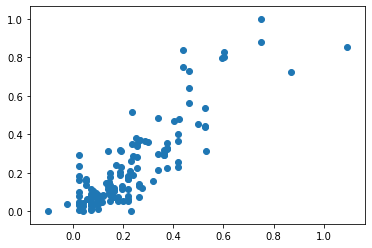

In [242]:
plt.scatter(y_train_pred,y_train)
#plt.plot(y_train_pred,res,"y")

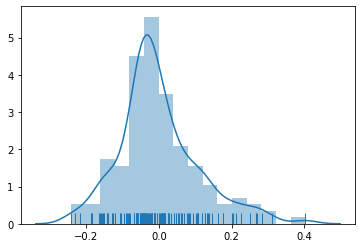

In [243]:
sns.distplot(res, rug=True)

### Error Terms (Residuals) are normally distributed and centered to mean 0

# <font color = "green">Begin with the Test Dataset

### Let's scale the test dataset 

In [244]:
to_be_scaled = ['symboling','doornumber','wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber',
                'enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_test[to_be_scaled] = scaler.transform(df_test[to_be_scaled])

C:\Users\Tamma\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Tamma\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [245]:
df_test.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
160,0.4,1,1,1.0,1,0.313793,0.409756,0.341667,0.460177,0.235066,0.2,0.139623,0.404762,0.424242,0.12500,0.091667,0.265306,0.694444,0.810811,0.072382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
186,0.8,1,1,1.0,1,0.368966,0.497561,0.433333,0.699115,0.305275,0.2,0.181132,0.404762,0.611111,0.12500,0.154167,0.448980,0.388889,0.459459,0.093295,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
59,0.6,1,1,0.0,1,0.420690,0.596748,0.516667,0.522124,0.347944,0.2,0.230189,0.563492,0.606061,0.10000,0.150000,0.265306,0.361111,0.405405,0.102964,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165,0.6,1,1,0.0,1,0.272414,0.448780,0.308333,0.424779,0.301396,0.2,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.115479,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
140,0.8,1,1,0.0,1,0.231034,0.263415,0.291667,0.699115,0.291699,0.2,0.177358,0.746032,0.227273,0.10625,0.104167,0.102041,0.361111,0.378378,0.068652,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [246]:
df_test.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.583871,0.887097,0.822581,0.564516,0.967742,0.437764,0.559481,0.480376,0.559663,0.428470,0.232258,0.265673,0.556580,0.544314,0.209375,0.248858,0.393351,0.328405,0.363993,0.239439,0.0,0.032258,0.032258,0.048387,0.0,0.048387,0.064516,0.016129,0.0,0.064516,0.016129,0.064516,0.064516,0.048387,0.048387,0.032258,0.0,0.048387,0.016129,0.193548,0.080645,0.080645,0.032258,0.080645,0.338710,0.451613,0.096774,0.016129,0.564516,0.419355,0.032258,0.0,0.048387,0.806452,0.048387,0.064516,0.0,0.048387,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129
std,0.271724,0.319058,0.385142,0.499868,0.178127,0.212861,0.189947,0.165440,0.215811,0.179488,0.088288,0.162820,0.228484,0.160738,0.273690,0.163376,0.192092,0.172009,0.181845,0.233076,0.0,0.178127,0.178127,0.216335,0.0,0.216335,0.247676,0.127000,0.0,0.247676,0.127000,0.247676,0.247676,0.216335,0.216335,0.178127,0.0,0.216335,0.127000,0.398304,0.274512,0.274512,0.178127,0.274512,0.477134,0.501716,0.298064,0.127000,0.499868,0.497482,0.178127,0.0,0.216335,0.398304,0.216335,0.247676,0.0,0.216335,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,0.200000,0.067925,-0.111111,-0.060606,0.000000,0.016667,0.000000,0.027778,-0.027027,0.007763,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,1.000000,1.000000,0.000000,1.000000,0.313793,0.459350,0.358333,0.384956,0.305275,0.200000,0.177358,0.404762,0.484848,0.093750,0.107292,0.265306,0.166667,0.216216,0.092342,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,1.000000,1.000000,1.000000,1.000000,0.387931,0.547967,0.441667,0.588496,0.406129,0.200000,0.226415,0.563492,0.585859,0.125000,0.218750,0.346939,0.305556,0.351351,0.158991,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,

In [247]:
y_test = df_test.pop('price')
X_test = df_test

In [248]:
print(X_test.shape)
print(y_test.shape)

(62, 64)
(62,)


In [249]:
X_test.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
160,0.4,1,1,1.0,1,0.313793,0.409756,0.341667,0.460177,0.235066,0.2,0.139623,0.404762,0.424242,0.12500,0.091667,0.265306,0.694444,0.810811,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
186,0.8,1,1,1.0,1,0.368966,0.497561,0.433333,0.699115,0.305275,0.2,0.181132,0.404762,0.611111,0.12500,0.154167,0.448980,0.388889,0.459459,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
59,0.6,1,1,0.0,1,0.420690,0.596748,0.516667,0.522124,0.347944,0.2,0.230189,0.563492,0.606061,0.10000,0.150000,0.265306,0.361111,0.405405,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165,0.6,1,1,0.0,1,0.272414,0.448780,0.308333,0.424779,0.301396,0.2,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
140,0.8,1,1,0.0,1,0.231034,0.263415,0.291667,0.699115,0.291699,0.2,0.177358,0.746032,0.227273,0.10625,0.104167,0.102041,0.361111,0.378378,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


Before predicitng we need to have the set of variables on which we have trained our model.

In [250]:
#columns in our final model
X_test[X_train_20.columns]

,cylindernumber,boreratio,peakrpm,CarName_bmw,fuelsystem_idi
160,0.2,0.404762,0.265306,0,0
186,0.2,0.404762,0.448980,0,0
59,0.2,0.563492,0.265306,0,0
165,0.2,0.444444,1.000000,0,0
140,0.2,0.746032,0.102041,0,0
...,...,...,...,...,...
28,0.2,0.523810,0.346939,0,0
29,0.2,0.730159,0.346939,0,0
182,0.2,0.261905,0.265306,0,1
40,0.2,0.373016,0.673469,0,0


In [251]:
#need to add constant to the test dataset

In [252]:
X_test_sm =  sm.add_constant(X_test[X_train_20.columns])

C:\Users\Tamma\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [253]:
X_test_sm.head()

,const,cylindernumber,boreratio,peakrpm,CarName_bmw,fuelsystem_idi
160,1.0,0.2,0.404762,0.265306,0,0
186,1.0,0.2,0.404762,0.448980,0,0
59,1.0,0.2,0.563492,0.265306,0,0
165,1.0,0.2,0.444444,1.000000,0,0
140,1.0,0.2,0.746032,0.102041,0,0


## <font color="#ED7025" >Model Evaluation on Test set</font>

In [254]:
y_test_pred =  lr_model.predict(X_test_sm)

Text(0, 0.5, 'y_test_pred')

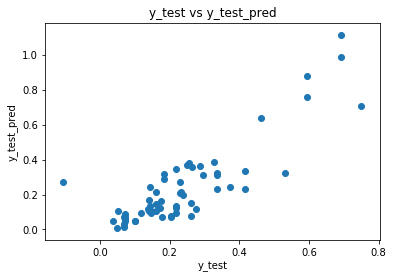

In [255]:
plt.scatter(y_test_pred,y_test)
plt.title('y_test vs y_test_pred')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

In [256]:
res_test = (y_test - y_test_pred)

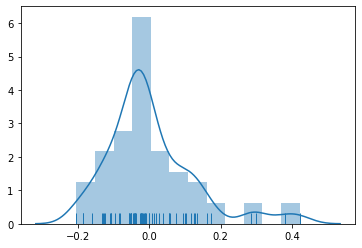

In [257]:
sns.distplot(res_test,rug=True)

In [258]:
from sklearn.metrics import r2_score

In [259]:
rsquare = r2_score(y_test,y_test_pred)
round(rsquare,3)

0.713

# Final Train Model R-squared:	0.738
# Model evaluation on Test set R-squared : 0.713